# Homework Week 04
Nicola Zomer <br>
10 November, 2022

## Assignment
1) Generate a random a SxS matrix with C non zero entries and 1-C zeros (C is between zero and one). Set the diagonal to -d. The non-zero elements are drawn  from a given distributions. Calculate the eigenvalues. Repeat different realizations and plot all the eigenvalues in the complex plane [Real part (x-axis) and imaginary part (y-axis)]. Compare this result with the expectations from the circular law. 
   
2) Generate the same as above but for mutualistic structure and find how the maximum real eigenvalues scales with S (use S=20,30,40,..100) and compares your numerical finding with the analytical expectations (we did not explicitly have calculated this in class). 
   
3) Analyse the food web using the metrics we have seen in class. The file represent the weighted adjacency matrix of the food web. For the analysis you can binarize (zero and one) the matrix. You find the file in the google drive.
   
4) (optional) Calculate the same as 1) but with for the cascade model or for the nested mutualistic network. 

In [22]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

from dash import Dash
import plotly.express as px
import pandas as pd

%matplotlib inline

# Point 1 
## The Circular Law
Consider the Generalized Lotka-Volterra Dynamics, describing the interaction of $S$ species through a network:
$$
    \frac{dN_i}{dt} = a_iN_i(t)- N_i(t)\sum_{j=1}^{S} \alpha_{ij}N_j(t) \quad i=1, ..., S
$$
The Jacobian matrix evaluated at the non-trivial equilibrium point of the system is given by:
$$
    J_{ij}=\frac{\partial \dot{N}_i}{\partial N_j}\Bigr\rvert_{\bar{N}^*} = N_i^*\alpha_{ij}
$$

We consider a stationary point $\bar{N}^*=(1, 1, ...., 1)$, which implies that $J_{ij}=\alpha_{ij}$, and we model $\alpha$ as a random matrix, for example assuming that $\alpha_{ij}$ are drawn from a Gaussian distribution, $\alpha_{ij} \sim \mathcal{N}(0, \sigma^2)$. Assuming interactions are i.i.d. random variables and $\alpha_{ii}=0$ for all $i=1, ..., S$, then all eigenvalues of $\alpha/\sqrt{S\sigma^2}$ are uniformly distributed within the unitary disk in the complex plane. This is called _Circular Law_.

Moreover, if we add the effect of self-interactions and we model it as a constant intra-specied competition, $\alpha_{ii}=-d <0$, then the disk containing all the eigenvalues of $\alpha$ is translated on the real axis, that is:
- the disk center is $(-d, 0)$
- the disk radius is $\sqrt{S\sigma^2}$

Notice that in general $\sigma$ is the standard deviation of the random variable $X$ from which the coefficients $\alpha_{ij}$ take value. 

If we further introduce a constant $C$, called _connectance_, such that with probability $C$ the coefficient of $\alpha_{ij}$ are sampled by the selected distribution and with probability $0$ are set to $0$, than the radius of the disk becomes:
$$
    r= \sqrt{SC\sigma^2}
$$


## Construction of the Random Matrices
Notation: in this context we call $M_{ij}$ the random matrix, and $D$ the distribution we have selected (for example $D =\mathcal{N}(0, \sigma^2)$). 

**Off-diagonal elements** <br>
For each off-diagonal term of the matrix we draw a random value $p$ from a uniform distribution $\mathcal{U}[0, 1]$. If $p<C$, we set $M_{ij}$ by sampling it from $D$, otherwise we impose $M_{ij}=0$

**Diagonal elements** <br>
All diagonal elements, $M_{ii}$, are set to $−d$. 



In [17]:
# parameters
C = 0.85
d = 1
S = 100
sigma = 1

# center and radius of the circle
center = [-d, 0]
radius = m.sqrt(S*C*sigma**2)

# random matrix
def randommatrix(size, diag, connectance, D=lambda: np.random.normal(0, sigma), myseed=1234):
    
    # initialize seed and matrix
    np.random.seed(myseed)
    M = np.zeros((size, size))
    
    # 1. off-diagonal elements
    for i in range(size):
        for j in range(size):
            if i!=j:
                p = np.random.uniform()
                
                if p<C:
                    M[i, j] = D()
    
    # 2. diagonal elements
    np.fill_diagonal(M, -d)

    return M


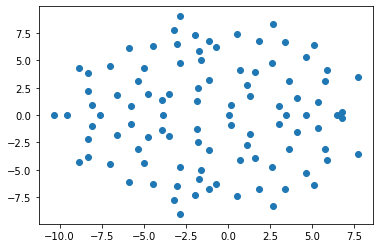

In [20]:
M = randommatrix(S, d, C)
eig_M, _ = np.linalg.eig(M)

plt.scatter(np.real(eig_M), np.imag(eig_M))

Idee per la dashboard: 
- S fisso
- d, C imposti dall'utente, con dei vincoli (d>0, C<1)
- sigma imposto se seleziono non uniforme
- possibilità di selezionare tra diverse distribuzioni (uniforme, normale, exponential)

# Point 2

# Point 3

# Point 4